In [1]:
import numpy as np
import imageio.v2 as imageio
damier = imageio.imread("damier-ng.jpeg")
imageio.imsave("damier-ng.png", damier)

In [2]:
paysage = imageio.imread("paysage_zen.png")
paysage.shape

(432, 1426, 3)

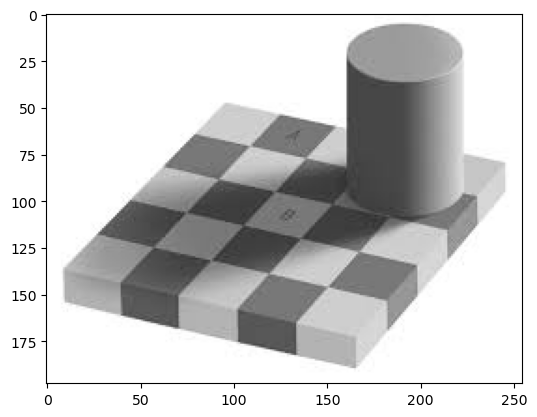

In [3]:
import matplotlib.pyplot as plt
plt.imshow(damier,cmap="gray")

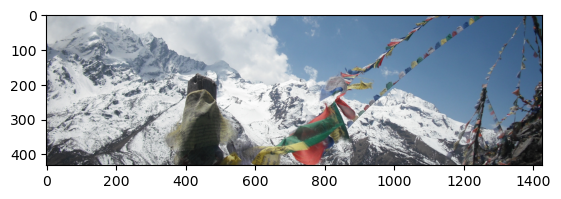

In [4]:
paysage = imageio.imread("paysage_zen.png")
plt.imshow(paysage)

# <center> Partie 1 & 2

In [5]:
import cv2

def ajouter_bord_noir(image, k):
    # Vérifier si k est non négatif et non nul
    if k <= 0:
        raise ValueError("La largeur du bord doit être positive.")
    image[:k, :] = 0
    image[-k:, :] = 0
    image[:, :k] = 0
    image[:, -k:] = 0
    return image

def inverser_pixels(image):
    return 255 - image

def appliquer_masque_blanc(image, x, y, L, H):
    if x < 0 or y < 0 or L <= 0 or H <= 0:
        raise ValueError("Les coordonnées et dimensions doivent être positives.")
    image[y:y+H, x:x+L] = 255
    return image

# Charger une image en niveau de gris (Assurez-vous que le chemin est correct)
image = cv2.imread('damier-ng.jpeg', cv2.IMREAD_GRAYSCALE)

# Appliquer les fonctions
image_bord_noir = ajouter_bord_noir(image.copy(), 10)
image_inversee = inverser_pixels(image.copy())
image_masque_blanc = appliquer_masque_blanc(image.copy(), 300, 300, 300, 100)

# Afficher l'image originale et les images modifiées pour vérifier les résultats
cv2.imshow('Image Originale', image)
cv2.imshow('Bord Noir', image_bord_noir)
cv2.imshow('Inversion des Pixels', image_inversee)
cv2.imshow('Masque Blanc', image_masque_blanc)
cv2.waitKey(0)
cv2.destroyAllWindows()


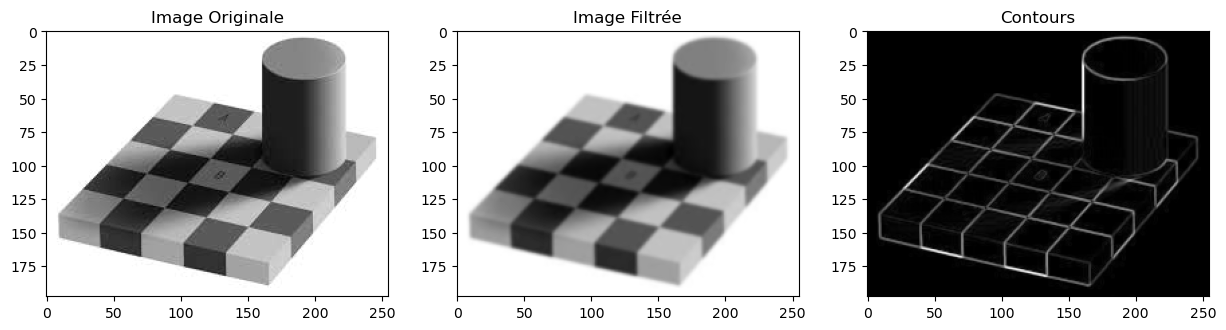

In [6]:
import numpy as np
from scipy.signal import convolve2d
from skimage import io, color
import matplotlib.pyplot as plt

def filtrer(im, K):
    return convolve2d(im, K, mode='same', boundary='wrap') / K.sum()

def extraire_contours(im, Gx, Gy):
    grad_x = convolve2d(im, Gx, mode='same', boundary='wrap')
    grad_y = convolve2d(im, Gy, mode='same', boundary='wrap')
    return np.sqrt(grad_x**2 + grad_y**2)

# Définition des matrices de convolution
K = np.array([[1, 2, 4, 2, 1],
              [2, 4, 8, 4, 2],
              [4, 8, 16, 8, 4],
              [2, 4, 8, 4, 2],
              [1, 2, 4, 2, 1]]) / 100

Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Gy = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

# Charger une image et la convertir en niveaux de gris
im = color.rgb2gray(io.imread('damier-ng.png'))

# Appliquer le filtrage
im_filtree = filtrer(im, K)

# Extraire les contours
contours = extraire_contours(im, Gx, Gy)

# Affichage des résultats
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Image Originale')
plt.imshow(im, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Image Filtrée')
plt.imshow(im_filtree, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Contours')
plt.imshow(contours, cmap='gray')
plt.show()